In [3]:
import matplotlib.pyplot as plt
import empyrical as ep
import numpy as np
from matplotlib.ticker import FuncFormatter

def percentage(x, pos):
    """
    Adds percentage sign to plot ticks.
    """

    return '%.0f%%' % x

def plot_drawdown_underwater(returns, is_portfolio=True, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    y_axis_formatter = FuncFormatter(percentage)
    ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))

    df_cum_rets = ep.cum_returns(returns, starting_value=1.0)
    running_max = np.maximum.accumulate(df_cum_rets)
    underwater = -100 * ((running_max - df_cum_rets) / running_max)

    if is_portfolio:
        (underwater).plot(ax=ax, kind='line', color='red', alpha=0.7, zorder=1, linewidth=1, label="portfolio", **kwargs)
    else:
        (underwater).plot(ax=ax, kind='area', color='slategray', alpha=0.5, linestyle='-', zorder=0, linewidth=1, label="benchmark", **kwargs)

    ax.set_ylabel('Drawdown')
    ax.set_title('Underwater plot')
    ax.set_xlabel('')
    return ax

C:\Users\Pandelus\AppData\Roaming\Python\Python313\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.642%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2019-09-02
End date,2025-07-18
Total months,72
,Backtest
Annual return,11.642%
Cumulative returns,95.244%
Annual volatility,8.439%
Sharpe ratio,1.42
Calmar ratio,0.59
Stability,0.96
Max drawdown,-19.855%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.86,2020-01-20,2020-03-23,2020-11-09,211
1,7.81,2022-06-08,2022-07-14,2023-01-06,153
2,7.73,2025-03-19,2025-04-07,2025-05-21,46
3,4.18,2024-05-20,2024-08-05,2024-09-24,92
4,3.88,2023-03-06,2023-03-20,2023-07-19,98


C:\Users\Pandelus\AppData\Roaming\Python\Python313\site-packages\pyfolio\plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


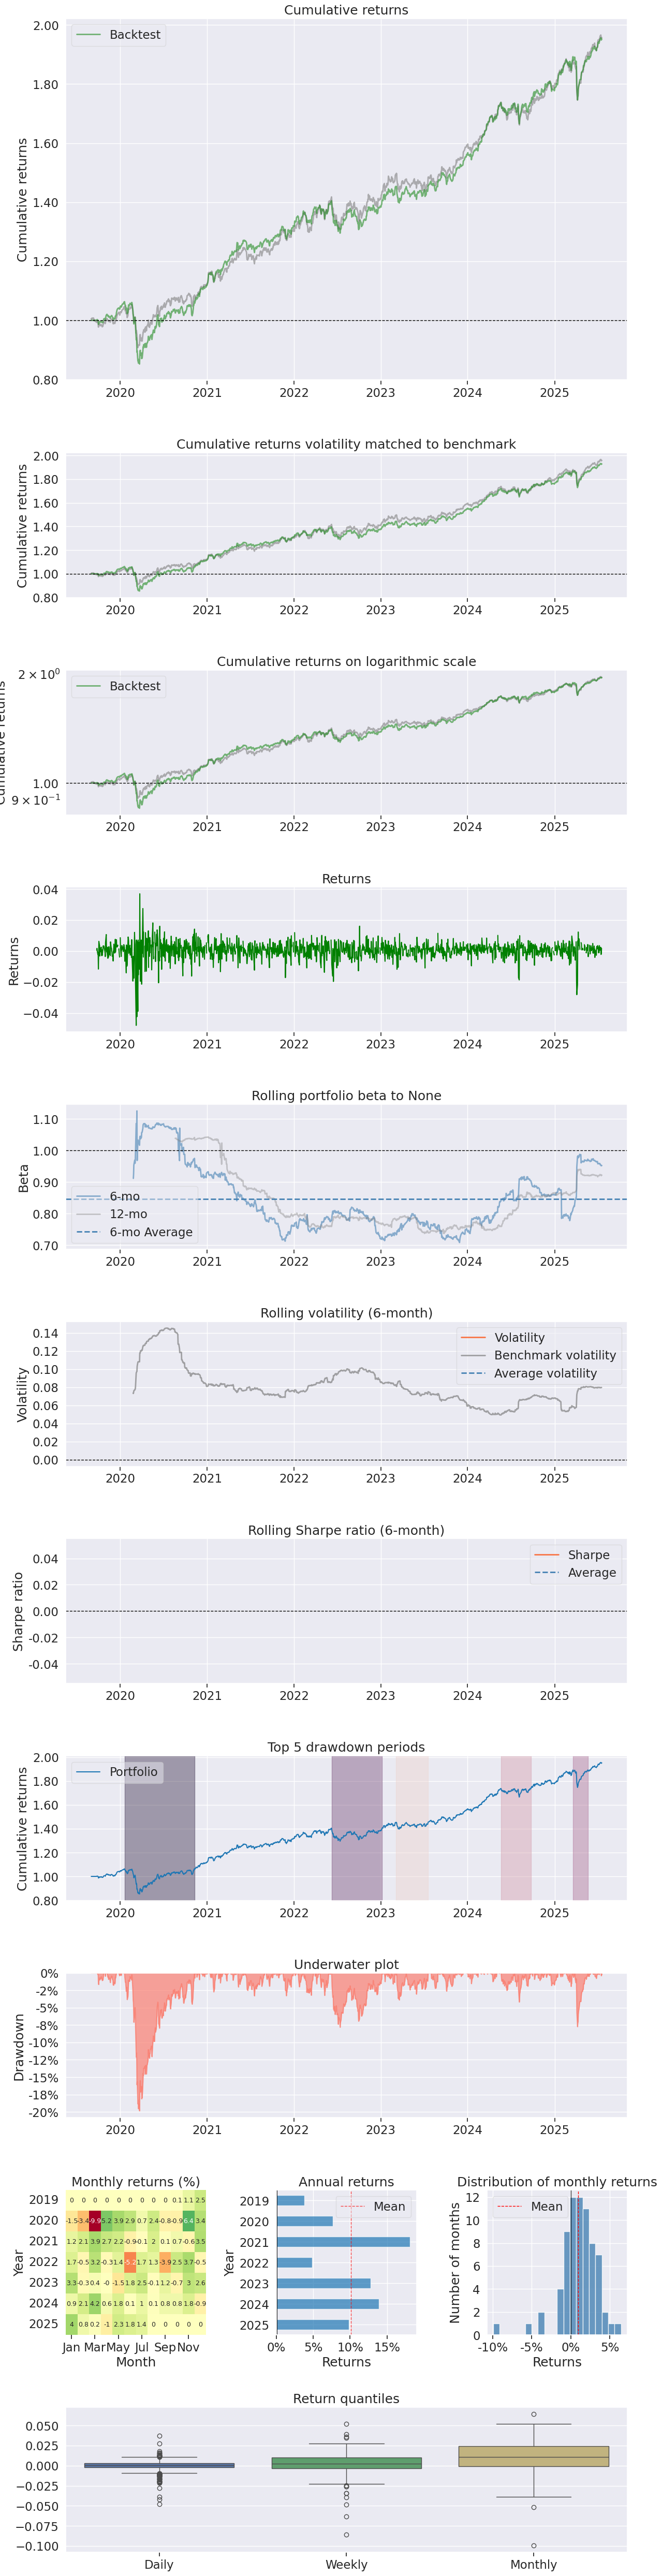

In [ ]:
import pandas as pd
import pyfolio as pf

from FundSelection import FundSelection
from Portfolio import Portfolio

# Calculate weights based on maximising Sharpe ratio
fund_selection = [
    FundSelection('Ranmore Global Equity Investor GBP'),
    FundSelection('Fidelity Global Technology W-Acc-GBP'),
    FundSelection('MFS Meridian Contrarian Value W1 GBP'),
    FundSelection('FAST - Global Fund Y-PF-ACC-GBP'),
    FundSelection('YFS Argonaut Absolute Return I GBP Acc'), #,0.12),
    FundSelection('WisdomTree Physical Gold GBP Daily Hdgd'),
    FundSelection('iShares Blmbrg Enh Roll Yld Cmd Swap ETF GBP'),
    FundSelection('JupiterMerian Glb Eq AbsRt I £ H Acc'),
    FundSelection('Prem Miton Tellworth UK Sel Fd - Cl AAcc'),
    FundSelection('Orbis OEIC Global Balanced Standard'), 
    FundSelection('UBS FTSE RAFI Developed 1000 Index C Acc'),
    FundSelection('JPM Europe Equity Absolute Alpha C (perf) (dist) - GBP (hedged)'), #, 0.09), #  0.1),
    FundSelection('Vanguard FTSE AllWld HiDivYld ETF USDAcc GBP'),
    FundSelection('Man High Yield Opports Profl Acc C'), #,0.1), 
    FundSelection('Artemis Global Income I Acc'),
    FundSelection('Artemis SmartGARP Glb EM Eq I Acc GBP')
]

# Fixed weights benchmark
benchmark = [
    FundSelection('Ranmore Global Equity Investor GBP', 0.25),

    #FundSelection('L&G Global 100 Index I Acc', 0.13),
    FundSelection('Fidelity Global Technology W-Acc-GBP', 0.13),

    FundSelection('MFS Meridian Contrarian Value W1 GBP', 0.06),
    FundSelection('FAST - Global Fund Y-PF-ACC-GBP', 0.06),
    FundSelection('YFS Argonaut Absolute Return I GBP Acc', 0.10),
    FundSelection('BH Macro GBP Ord', 0.10),
    FundSelection('WisdomTree Physical Gold GBP Daily Hdgd', 0.10),
    FundSelection('Winton Trend UCITS I GBP Acc', 0.05),
    FundSelection('iShares Blmbrg Enh Roll Yld Cmd Swap ETF GBP',0.05),
    FundSelection('JupiterMerian Glb Eq AbsRt I £ H Acc', 0.05),
    FundSelection('Prem Miton Tellworth UK Sel Fd - Cl AAcc', 0.05)
]

portfolio = Portfolio(fund_selection, benchmark, 6)
n_portfolio = len(fund_selection)
portfolio_weights = n_portfolio * [1 / n_portfolio]
portfolio_returns = pd.Series(np.dot(portfolio_weights, portfolio.adjusted_returns.T), index=portfolio.adjusted_returns.index)

benchmark = Portfolio(benchmark, fund_selection, 6)
benchmark_returns = pd.Series(np.dot([f.weight for f in benchmark.fund_selection], benchmark.adjusted_returns.T), index=benchmark.adjusted_returns.index)

pf.create_returns_tear_sheet(portfolio_returns, benchmark_rets=benchmark_returns)

#pf.plot_annual_returns(returns=portfolio_returns)

#pf.plot_monthly_returns_heatmap(returns=portfolio_returns)
#pf.plot_monthly_returns_timeseries(returns=portfolio_returns)


#pf.plot_drawdown_periods(returns=portfolio_returns, top=4)
#pf.plot_drawdown_periods(returns=benchmark_returns, top=4)

#plot_drawdown_underwater(returns=portfolio_returns, is_portfolio=True)
#plot_drawdown_underwater(returns=benchmark_returns, is_portfolio=False)

#pf.tears.create_full_tear_sheet(returns=portfolio_returns, benchmark_rets=benchmark_returns)




